In [1]:
import json
from pprint import pprint
from termcolor import colored
from colored import fg, bg, attr
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# if using a Jupyter notebook, includue:
%matplotlib inline
data_file = "predictor_result/scores_predict_88_acc.jsonl"
id2name = "../data/id2name.json"

color = bg('yellow_1') + fg('black')
reset = attr('reset')
blue = "blue"
green = "green"

print()

with open(id2name, 'r') as fp:
    id2name = json.load(fp)


In [2]:
def change_word_by_entity(entity_str, this_sentence,i,color):
        if list(map(lambda x: x.lower(), this_sentence[i:i + len(entity_str.split(" "))])) == entity_str.split():
            this_sentence = this_sentence[:i] + [colored(w, color, attrs=['bold']) for w in entity_str.split()] + \
                            this_sentence[i + len(entity_str.split(" ")):]
        return this_sentence


In [3]:
preffix = ""
def _show_sentence(head,tail,this_sentence,relation,correct_relation = None, is_prediction = False,prob : str = "",score: str = ""):
    print(preffix + "head:", colored(head, 'blue', attrs=['bold']), "  ,  ", "tail", colored(tail, 'green', attrs=['bold']))          
    this_sentence = this_sentence.split()
    for i, word in enumerate(this_sentence):
            if word.lower() == head.split()[0]:
                this_sentence = change_word_by_entity(head, this_sentence,i,blue)
            if word.lower() == tail.split()[0]:
                this_sentence = change_word_by_entity(tail, this_sentence,i,green)
    color = 'yellow' if correct_relation is None or relation == correct_relation else 'grey'
    if is_prediction: color = "red"
    if len(prob) > 0:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence) +" " + colored(prob, "magenta",attrs=['bold'])+"; "+ 
              colored(score, "magenta",attrs=['bold']))
    else:
        print(preffix + colored(relation, color,attrs=['bold']) + "\t", " ".join(this_sentence))

In [4]:
def show_set(data):
    correct_relation = data['correct_relation']
    prediction = data["prediction"]
    query = data['query']
    head = data['query_head']
    tail = data['query_tail']
    probability = data['probability'].replace("'","")[1:-1].split(",")
    scores = data['scores']
    _show_sentence(head,tail,query,correct_relation)
    print()

    for k in range(5):
        this_sentence = data["sentence_" +str(k)]
        head = data['sentence_'+str(k)+'_head']
        tail = data['sentence_'+str(k)+'_tail']
        relation = data['sentence_'+str(k)+'_relation']
        _show_sentence(head,tail,this_sentence,relation,correct_relation,  k == int(prediction),probability[k],
                       "{:.2f}".format(scores[k]))
    print()
    return correct_relation
        

In [5]:
total_wrong = 0
total_correct = 0
result_per_type = {}
correct_scroes = []
wrong_scores = []
pred_list = []
gold_list = []
wrong_prediction_which_rel = {}
with open(data_file) as f:
    for ex_index,line in enumerate(f,1):
        data = json.loads(line)
        scores = data['scores']
        pred_rel = data['sentence_' + data["prediction"] +'_relation']
        pred_score = scores[int(data["prediction"])]
        the_gold_rel = data['correct_relation']
        gold_list.append(the_gold_rel)
        pred_list.append(pred_rel)
        if data['answer'] == "wrong":
            assert pred_rel != the_gold_rel
            if not the_gold_rel in wrong_prediction_which_rel:
                wrong_prediction_which_rel[the_gold_rel] = Counter()
            wrong_prediction_which_rel[the_gold_rel].update([pred_rel])
            total_wrong +=1
            print("wrong example number: ",total_wrong,  "example number: ", ex_index)
            show_set(data)
            print()
            wrong_scores.append(pred_score)
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][0].append(data)
            
            
        else:
            result_per_type[the_gold_rel] = result_per_type.get(the_gold_rel,[[],[]])
            result_per_type[the_gold_rel][1].append(data)
            correct_scroes.append(pred_score)
            total_correct +=1





wrong example number:  1 example number:  2
head: cedar avenue bridge   ,   tail minnesota river
crosses	 The route crosses the minnesota river at the cedar avenue bridge between Bloomington and Eagan .

head: elandon roberts   ,   tail linebacker
position played on team / speciality	 He competed with David Harris , elandon roberts , and Trevor Bates throughout training camp for the starting middle linebacker job . 0.00; 38.15
head: baar baar dekho   ,   tail hindi
original language of film or TV show	 The occupancy of the show surpassed the hindi films baar baar dekho and Freaky Ali .  0.00; 37.06
head: samos   ,   tail aegean
located in or next to body of water	 Employing Christian craftsmen , he built a fleet , with which he captured Phocaea and the eastern aegean islands of Lesbos ( except for the fortress of Methymna ) , samos , Chios and Rhodes .  0.57; 58.40
head: gateshead millennium bridge   ,   tail river tyne
crosses	 Four bridges cross the river tyne at the Quayside : The H

head: gliese 176   ,   tail taurus
constellation	 gliese 176 b is a super - Earth exoplanet approximately 31 light years away in the constellation of taurus .  1.00; 52.64
head: rafael concepción   ,   tail super flyweight
competition class	 rafael concepción of Panama replaced Cazares as Donaire 's opponent for the Interim WBA super flyweight titleChrist S. " Rafael Concepcion subbed in as Aug. 15 opponent for Nonito Donaire . "  0.00; 39.14
head: the four seasons   ,   tail violin concerti opus 8
part of	 The Ensemble has recorded Handel 's Concerti Grossi Opus 6 and Vivaldi 's violin concerti opus 8 including ' the four seasons ' with Linn Records .  0.00; 40.29
head: greg bagwell   ,   tail air marshal
military rank	 In June 2016 he became Deputy Commander Operations at RAF Air Command in succession to air marshal greg bagwell .  0.00; 39.98


wrong example number:  58 example number:  505
head: ladislaus ii   ,   tail richeza of poland
child	 There he met richeza of poland , the d

wrong example number:  114 example number:  1021
head: crystal palace   ,   tail retiro park
part of	 Ricardo Velázquez Bosco designed the crystal palace and the Palace of Velázquez in the retiro park .

head: prince george of greece and denmark   ,   tail princess marie bonaparte
spouse	 On 21 November 1907 , Jeanne served as a witness for the marriage of her niece princess marie bonaparte to prince george of greece and denmark . 0.00; 35.98
head: guru   ,   tail hindi
original language of film or TV show	 He has acted in hindi films like " Honeymoon Travels Pvt Ltd " , " guru " , " Aap Kaa Surroor " , Phata Poster Nikla Hero and " Humshakals . "  0.00; 39.55
head: ngc 2535   ,   tail cancer
constellation	 NGC 2536 is a barred spiral galaxy with a prominent inner ring structure encircling the bar in the constellation cancer that is interacting with ngc 2535 .  0.73; 47.61
head: albert sidney johnston   ,   tail general
military rank	 Later , in September , his command was ordered to C

head: 1930 reichstag elections   ,   tail 1928 reichstag elections
follows	 In the 1928 reichstag elections , 0.7 % of the local votes went to Adolf Hitler ’s party , but by the 1930 reichstag elections , this had grown to 24.4 % .  0.00; 39.33
head: judith raskin   ,   tail soprano
voice type	 judith raskin ( June 21 , 1928 – December 21 , 1984 ) was an American lyric soprano , renowned for her fine voice as well as her acting .  0.00; 36.40
head: schuylkill arsenal railroad bridge   ,   tail schuylkill river
crosses	 schuylkill arsenal railroad bridge is a wrought iron , two - track , deck truss swing bridge across the schuylkill river in the University City neighborhood in Philadelphia , Pennsylvania .  1.00; 58.18


wrong example number:  169 example number:  1562
head: mateusz   ,   tail ski jumper
sport	 He has an older brother mateusz , who is a ski jumper too .

head: bhavishyachi aishi taishi   ,   tail marathi
original language of film or TV show	 bhavishyachi aishi taishi - 

head: sir allan adair   ,   tail major-general
military rank	 The division retained all of its original units , but with some changes : Major - General sir allan adair remained in command of the reorganized division .  0.00; 48.08
head: zach ertz   ,   tail tight end
position played on team / speciality	 This was due to a larger role that zach ertz played in the tight end position , and Brent would be relegated to back - up and would be rotated occasionally to keep Ertz rested .  0.00; 40.03


wrong example number:  232 example number:  2105
head: skymapper   ,   tail siding spring
part of	 skymapper will reside at the ANU 's other observatory ( siding spring ) and be operated remotely from Mount Stromlo .

head: byomkesh bakshi   ,   tail bengali
original language of film or TV show	 Byomkesh O Chiriyakhana is 2016 Indian Thriller film on bengali fictional detective byomkesh bakshi . 0.00; 37.76
head: ngc 1528   ,   tail perseus
constellation	 It passed near the perseus star clusters 

head: song dynasty   ,   tail later zhou
follows	 In 960 , the later zhou general Zhao Kuangyin overthrew Guo Rong 's son and successor Guo Zongxun , establishing a new song dynasty as its Emperor Taizu .  0.79; 51.59


wrong example number:  295 example number:  2703
head: l10   ,   tail barcelona metro
part of	 It is served by TMB - operated barcelona metro lines L2 and l10 , and Trambesòs route T5 .

head: per gessle   ,   tail roxette
member of	 entrepreneur and debater on religion and humanism ) , per gessle ( a member of the pop groups Gyllene Tider and roxette ) , and Cons T. Åhs ( a computer science researcher ) . 0.86; 44.43
head: planet earth   ,   tail 1981 debut album
part of	 The title derives from the lyrics of " planet earth " , a song on Duran Duran 's 1981 debut album .  0.04; 41.43
head: marian więckowski   ,   tail racing cyclist
sport	 marian więckowski ( born 8 September 1933 ) is a Polish former racing cyclist .  0.01; 39.83
head: keltine   ,   tail keltos
child	 

wrong example number:  358 example number:  3257
head: william i, count of nassau-dillenburg   ,   tail juliana of stolberg
spouse	 She was the second daughter of William I , Count of Nassau - Dillenburg and juliana of stolberg , making Maria a sister of William the Silent .

head: amy stiller   ,   tail anne meara
mother	 The film features actor Ben Stiller , his sister amy stiller and their parents , Jerry Stiller and anne meara . 0.94; 58.43
head: scarecrow island   ,   tail lake huron
located in or next to body of water	 scarecrow island is located in Thunder Bay , a U.S. National Marine Sanctuary in northwestern lake huron .  0.00; 37.23
head: james yap   ,   tail kris aquino
spouse	 On the fourth period , james yap , who was celebrating his 24th birthday made clutch freethrows , much to the delight of fiancee kris aquino .  0.06; 55.64
head: left party   ,   tail riksdag
part of	 Kjell - Erik Karlsson , born 1946 , is a Swedish left party politician , member of the riksdag 1998–2

spouse	 He is the son of Canadian Olympic figure skaters don fraser and candace jones .

head: edward russell   ,   tail admiral
military rank	 He was pardoned after he gained the support of admiral edward russell . 0.00; 45.74
head: lisa rae jacob   ,   tail swimmer
sport	 lisa rae jacob ( born May 13 , 1974 ) is an American former competition swimmer who won two gold medals at the 1996 Summer Olympics in Atlanta .  0.00; 44.79
head: marie-caroline du fresnay   ,   tail maria du fresnay
mother	 She was maria du fresnay 's mother as well as Marie - Caroline Du Fresnay 's and Ange Du Fresnay 's grandmother .  0.81; 54.72
head: interstate 182 bridge   ,   tail columbia river
crosses	 I-182 and US 12 cross over the columbia river into Pasco on the interstate 182 bridge and become concurrent with US 395 before the former designation ends abruptly .  0.00; 35.32
head: isabella   ,   tail hethum i
spouse	 The Rubenid dynasty fell in 1252 after the death of the last Rubenid monarch isabella ,

member of	 " morning musume ’s tanaka reina goes on a date " . 0.46; 49.49
head: khmelnitsky   ,   tail southern bug
located in or next to body of water	 Located 49 ° 23'N , 27 ° 37'E on the main road between khmelnitsky and Vinnytsia at the confluence of the Volk and the southern bug rivers .  0.00; 36.31
head: 14th   ,   tail 13th
follows	 Telfair was elected as a Democratic - Republican to the 13th and 14th United States Congresses , serving from March 4 , 1813 , to March 3 , 1817 .  0.00; 42.72
head: mykhailo koval   ,   tail colonel general
military rank	 The same day , the State Border Guard Service of Ukraine informed that unknown persons took hostage Ukrainian colonel general mykhailo koval .  0.54; 49.65
head: waco suspension bridge   ,   tail brazos river
crosses	 Downtown Waco was built around the waco suspension bridge , which was a crucial crossing of the brazos river .  0.00; 38.75


wrong example number:  485 example number:  4250
head: john allen   ,   tail colonel
mili

located in or next to body of water	 It is located between Władysławowo and Kuźnica on the hel peninsula on the southern baltic sea in Puck County , Pomeranian Voivodeship , northern Poland .  0.49; 47.30
head: aayusu nooru   ,   tail tamil
original language of film or TV show	 aayusu nooru ( English : 100 years of life ) is a 1987 tamil Indian feature film directed by Ponmani Rajan and produced by M.D.Kalairajan for Sampath Creations .  0.00; 40.30
head: 2013 edition   ,   tail 2012 chicago marathon
follows	 Whilst in Chicago Njeim took up running , completing the 2012 chicago marathon in 3 hours 7 minutes and the 2013 edition of the race in 3:05.4 .  0.03; 44.63
head: eurobonus   ,   tail sas
part of	 On 1 January 2010 , Air Greenland suspended its participation in sas 's eurobonus frequent - flyer program .  0.47; 47.25


wrong example number:  548 example number:  4749
head: jamila wideman   ,   tail basketball
sport	 jamila wideman ( born October 16 , 1975 ) is an American female 

constellation	 mintaka is the westernmost of the three stars of orion 's belt .  0.00; 44.51
head: askold island   ,   tail peter the great bay
located in or next to body of water	 Both known specimens of the giant stumptail stingray were caught in the peter the great bay off askold island , near Vladivostok .  0.00; 41.51
head: anne cox chambers   ,   tail james cox chambers
child	 In 2015 , anne cox chambers distributed her 49 % share in Cox Enterprises equally between her three children , Katharine Rayner , Margaretta Taylor , and james cox chambers .  0.80; 50.34


wrong example number:  611 example number:  5389
head: north london line   ,   tail london overground
part of	 It is now owned by Network Rail and used by london overground for north london line passenger trains running between Richmond and Stratford .

head: cuts you up   ,   tail deep
part of	 " cuts you up " is a song by English musician Peter Murphy , from his third solo studio album , " deep " ( 1989 ) . 0.01; 42.02

mother	 Yodo - dono 's youngest sister , Oeyo , also known as ogō , was the principal wife of Shogun Tokugawa Hidetada and the mother of his successor tokugawa iemitsu .  0.97; 52.86
head: bryn renner   ,   tail american football
sport	 bryn renner ( born January 22 , 1990 ) is an american football quarterback who is currently a free agent .  0.00; 42.06


wrong example number:  674 example number:  5987
head: david hurn   ,   tail magnum photos
member of	 david hurn ( born 21 July 1934 ) is a British documentary photographer and member of magnum photos .

head: czesław piątas   ,   tail general
military rank	 Gen. czesław piątas ( born 20 March 1946 ) is a Polish general , former Chief of general Staff of the Polish Army . 0.74; 47.17
head: eglisau railway bridge   ,   tail rhine
crosses	 Between the two stations , the line crosses the eglisau railway bridge over the rhine .  0.00; 40.62
head: gold on the ceiling   ,   tail el camino
part of	 " gold on the ceiling " is the third track

position played on team / speciality	 Because of an injury to kurt petersen , he was the right guard in the offensive line that blocked on Tony Dorsett 's record 99-yard touchdown run against the Minnesota Vikings .  0.29; 48.48


wrong example number:  737 example number:  6453
head: "historia naturalis"   ,   tail natural history
main subject	 Pliny 's own table of contents for his encyclopedic " Historia naturalis " ( " natural history " ) may be viewed online in Latin and in English ( following dedication ) .

head: angela gheorghiu   ,   tail soprano
voice type	 " Lyric Opera of Chicago fires soprano angela gheorghiu " , Associated Press , via " The International Herald Tribune " , September 28 , 2007 . 0.00; 41.96
head: margaret of denmark   ,   tail king james iii of scotland
spouse	 Another important historical site in the area is the ruins of Cambuskenneth Abbey , the resting place of king james iii of scotland and his queen , margaret of denmark .  0.00; 39.59
head: cutthroat

head: catherine   ,   tail henry ii, duke of świdnica
spouse	 The elder of Charles 's two possible daughters , catherine , who was born in the early 1320s , was the wife of Henry II , Duke of Świdnica .

head: thendral   ,   tail tamil
original language of film or TV show	 He is known for his role as tamil in the tamil prime time Megaserial on Sun TV thendral . 0.00; 33.42
head: newark   ,   tail catholic church
part of	 The school and parish are in the Southeastern Morris Deanery of the Diocese of Paterson of the Province of newark of the Latin Rite of the catholic church .  0.00; 35.99
head: archduke ferdinand karl viktor of austria-este   ,   tail archduchess elisabeth franziska of austria
spouse	 She was the only daughter of the late Archduke Ferdinand Karl Viktor of Austria - Este ( 1821–1849 ) and of his wife archduchess elisabeth franziska of austria ( 1831–1903 ) .  0.08; 51.24
head: doc/fest   ,   tail documentary film
main subject	 It premièred at Europe 's largest documentar


head: come alive   ,   tail good time
follows	 It was directed by Hannah Lux Davis who had previously worked with Hilton on music videos for her singles " good time " and " come alive " . 0.00; 43.00
head: ngc 429   ,   tail cetus
constellation	 ngc 429 is a lenticular galaxy of type S0 ^ 0 : located in the constellation cetus .  0.56; 48.54
head: sultan-agha khanum   ,   tail tahmasp i
spouse	 Sultan - Agha Khanum was married to king tahmasp i , having one daughter known as Pari Khan Khanum , and a son known as Suleiman Mirza .  0.00; 41.42
head: super combined   ,   tail 2014 winter olympics
part of	 At the 2014 winter olympics in Sochi , Russia , Maze finished fourth in the super combined at Rosa Khutor .  0.43; 48.28
head: bruno bichir   ,   tail maricruz nájera
mother	 He is the husband of maricruz nájera , and the father of Odiseo , Demián and bruno bichir .  0.00; 38.96


wrong example number:  864 example number:  7771
head: ryan rossiter   ,   tail basketball
sport	 ryan ross

follows	 Robinson was elected as a Democrat to the Thirty - sixth , Thirty - seventh , and Thirty - eighth Congresses ( March 4 , 1859 – March 3 , 1865 ) . 0.83; 44.18
head: on your way, riley   ,   tail arthur lucan
main subject	 In 1982 , Alan Plater wrote a play , " On Your Way , Riley " , about the life of arthur lucan , with songs by Alex Glasgow .  0.10; 42.03
head: junetta jones   ,   tail soprano
voice type	 junetta jones ( born March 12 , 1936 ) was an American operatic soprano .  0.01; 39.81
head: grenadines   ,   tail lesser antilles
part of	 The island of Grenada , the southernmost of the main island chain of the lesser antilles , is part of an independent state that also comprises the southern grenadines , including Carriacou .  0.06; 41.60
head: lukáš krajíček   ,   tail defenceman
position played on team / speciality	 lukáš krajíček ( , born March 11 , 1983 ) is a Czech professional ice hockey defenceman who plays for HC Dinamo Minsk of the KHL .  0.00; 37.90


wrong exa

follows	 A dominant seventh chord in c minor is used as a pivot chord to return to b minor ( a similar progression is used in Brahms 's " Ballade " , Op .  0.00; 41.66
head: eddie clarence murray   ,   tail first baseman
position played on team / speciality	 eddie clarence murray ( born February 24 , 1956 ) , nicknamed " Steady Eddie " , is a former Major League Baseball ( MLB ) first baseman and designated hitter .  0.00; 40.29
head: rainbow quest   ,   tail raintrap
child	 rainbow quest 's other progeny included Quest for Fame , Saumarez , raintrap , Nedawi Spectrum and Millenary .  0.01; 52.77
head: gladys yang   ,   tail yang xianyi
spouse	 Young was born in Beijing to an academic family whose members have included yang xianyi and gladys yang .  0.04; 54.66


wrong example number:  990 example number:  8916
head: austro-hungarian   ,   tail adriatic
located in or next to body of water	 First World War naval action in the adriatic consisted mainly of Austro - Hungarian bombardments 

head: charles nepean   ,   tail goalkeeper
position played on team / speciality	 Their opponents had spent two weeks training for the match , an innovative concept at the time , but were repeatedly thwarted by charles nepean , the Oxford goalkeeper .  0.00; 41.77


wrong example number:  1055 example number:  9378
head: usa rugby   ,   tail international rugby board
member of	 The NA4 Committee is made up of the international rugby board , Rugby Canada and usa rugby .

head: nakhon sawan province   ,   tail bueng boraphet
located in or next to body of water	 It is situated in nakhon sawan province on the Northern Line Railway , near bueng boraphet . 0.11; 45.90
head: washington wizards   ,   tail basketball
sport	 The basketball program boasts famous alumni , including washington wizards head coach Scott Brooks and Detroit Lions tight end Darren Fells .  0.74; 47.84
head: indianapolis clowns   ,   tail negro american league
member of	 Both of them went on to play for the indianapolis c

military rank	 The son of Robert Langton Douglas , he was a half - brother to marshal of the royal air force William Sholto Douglas , 1st Baron Douglas of Kirtleside . 0.00; 38.38
head: ranjit singh   ,   tail duleep singh
child	 After the death of his father , the previous ruler of the Sikh empire Maharajah ranjit singh , Maharaja duleep singh is placed on the throne at the age of five .  0.00; 40.58
head: cross-country race   ,   tail 1924 olympics
part of	 At the 1924 olympics in Paris Rastas represented Finland in both the 5000 m and the cross - country race , the latter again doubling as a team competition .  0.00; 44.69
head: ngc 106   ,   tail pisces
constellation	 ngc 106 is a lenticular galaxy estimated to be about 270 million light - years away in the constellation of pisces .  0.03; 50.05
head: talim   ,   tail laguna de bay
located in or next to body of water	 Mount Tagapo , also known as Susong Dalaga mountain , is a conical peak on the lake island of talim on laguna de ba

In [6]:
print(total_wrong/(total_correct+total_wrong))
print((total_correct+total_wrong))

0.1134
10000


In [7]:
for k,v in result_per_type.items():
    print("acc for ", k)
#     print("total from this category:",(len(v[0])+len(v[1])))
    print(len(v[1])/ (len(v[0])+len(v[1]) ))

acc for  member of
0.7068403908794788
acc for  crosses
0.9608433734939759
acc for  part of
0.45320197044334976
acc for  mother
0.9334442595673876
acc for  child
0.9182692307692307
acc for  main subject
0.7688356164383562
acc for  military rank
0.9717868338557993
acc for  located in or next to body of water
0.8836858006042296
acc for  voice type
1.0
acc for  follows
0.940625
acc for  original language of film or TV show
1.0
acc for  position played on team / speciality
0.9934959349593496
acc for  spouse
0.7610062893081762
acc for  competition class
0.9895052473763118
acc for  constellation
0.9968701095461658
acc for  sport
0.8782161234991424


In [8]:
# check similarity between relations on train and dev
wrong_scores = np.array(wrong_scores)
correct_scroes = np.array(correct_scroes)


In [9]:
print(wrong_scores.mean())
print(wrong_scores.std())
print()
print(correct_scroes.mean())
print(correct_scroes.std())

51.28854679935193
4.716667833547981

59.225879765567996
6.527488833119853


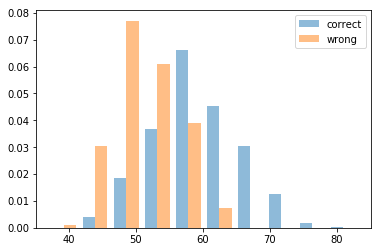

In [10]:
bins = [35,45,55,60,65,70]
plt.hist([correct_scroes,wrong_scores], 10, alpha=0.5, label=['correct','wrong'],density=True)
# plt.hist(wrong_scores, 10, alpha=0.5, label='wrong')
plt.legend(loc='upper right')
# plt.show()

In [11]:
# check unigrams intersection with other relations, both on tokens and entities
# on train as well
for d in result_per_type['member of'][1]:
    show_set(d)
    print()
    

head: european union   ,   tail european economic area
member of	 Being member of european economic area ( EEA ) , Norway implemented the european union directive 2002/24/EC .

head: benoît laffineur   ,   tail swimmer
sport	 benoît laffineur ( born 30 October 1957 ) is a French former swimmer . 0.00; 40.36
head: 2009 general elections   ,   tail 2006
follows	 Wilson was re - elected in the 2003 , 2006 , and 2009 general elections .  0.07; 44.06
head: lord may of oxford   ,   tail royal society
member of	 The inaugural Lord Lewis Prize was awarded to lord may of oxford , former President of the royal society and Chief Scientific Advisor to the UK Government , in 2008 .  0.81; 46.46
head: brunhilda   ,   tail goiswintha
mother	 In 579 , her stepson Hermenegild married her granddaughter Ingund , daughter of goiswintha 's daughter brunhilda by the Frankish king Sigebert I.  0.00; 40.32
head: the autocrats   ,   tail finnish
original language of film or TV show	 The film stars the familiar

head: peter knight   ,   tail steeleye span
member of	 Carole Pegg had an unusual fiddle style , quite unlike Fairport 's Dave Swarbrick or steeleye span 's peter knight , based partly on what she had learnt from older Yorkshire fiddle players . B.  0.89; 47.85


head: james murphy   ,   tail lcd soundsystem
member of	 In December 2012 , the band 's manager Scott Rodger confirmed that Arcade Fire was in the studio working with regular producer of the band Markus Dravs and james murphy , frontman of lcd soundsystem .

head: billy gibbons   ,   tail zz top
member of	 In the episode " The Man in the Fallout Shelter " , it was revealed Angela 's father is billy gibbons , a member of the band zz top . 1.00; 59.07
head: princess iron fan   ,   tail red boy
child	 He marries princess iron fan and has a son , red boy , with her .  0.00; 44.20
head: hill to hill bridge   ,   tail lehigh river
crosses	 PA 378 passes over Norfolk Southern 's Lehigh Line before crossing the lehigh river on the hil

member of	 brazil is the biggest troop contributing country to MINUSTAH , with 2,200 active military personnel . MINUSTAH Facts and Figures united nations Stabilization Mission in Haiti .  1.00; 57.92
head: klaus könig   ,   tail tenor
voice type	 klaus könig ( b : May 26 , 1934 in Beuthen , Upper Silesia ) is a German tenor opera singer .  0.00; 43.00


head: royal belgian football association   ,   tail uefa
member of	 The royal belgian football association , which governs the team , co - founded the international governing bodies FIFA ( in 1910 ) and uefa ( in 1954 ) .

head: benjamin van leer   ,   tail goalkeeper
position played on team / speciality	 benjamin van leer ( born 9 April 1992 in Houten ) is a Dutch professional footballer who currently plays as a goalkeeper for Ajax in the Dutch Eredivisie . 0.00; 41.93
head: tiffany marie roberts   ,   tail soccer
sport	 tiffany marie roberts Sahaydak ( born May 5 , 1977 ) , née tiffany marie roberts , is an American soccer coach , fo

head: angus watt   ,   tail lieutenant-general
military rank	 Lieutenant - General angus watt , CMM , CD is a retired Canadian air force general who was Chief of the Air Staff from 2007 to 2009 .  0.01; 45.60
head: ernestine schumann-heink   ,   tail contralto
voice type	 He returned to the United States in 1912 and toured with the contralto Ernestine Schumann - Heink .  0.00; 42.54


head: björk   ,   tail tappi tíkarrass
member of	 Thereafter , björk ventured into music bands experiences , singing as the lead voice of groups like tappi tíkarrass , Kukl , The Elgar Sisters and , most notably , The Sugarcubes .

head: paradise road   ,   tail world war ii
main subject	 In 1997 , she made her feature film debut in a supporting role in the world war ii drama " paradise road " . 0.00; 40.79
head: joe bygraves   ,   tail heavyweight
competition class	 joe bygraves ( 26 May 1931 – 16 January 2012 ) was a British heavyweight boxer .  0.26; 46.48
head: world figure skating championships   ,  

head: johnny ball   ,   tail zoë ball
child	 johnny ball ( born 23 May 1938 ) is an English television personality , a populariser of mathematics and the father of BBC Radio 2 DJ zoë ball .  0.00; 45.50
head: only the horses   ,   tail magic hour
part of	 Singles from " magic hour " included " Shady Love " , " only the horses " , " Baby Come Home " and " Let 's Have a Kiki " .  0.00; 53.73


head: sacramento mountain lions   ,   tail united football league
member of	 Josh Johnson , who is still playing , has spent time with 10 different NFL teams and the sacramento mountain lions of the united football league .

head: maindhan   ,   tail tamil language
original language of film or TV show	 maindhan ( English : Son ) is a 2014 tamil language Malaysian action comedy film directed by C. Kumaresan , who also enacted the lead role . 0.00; 35.75
head: william warfield   ,   tail baritone
voice type	 The version of Set 1 for baritone and orchestra was premiered on January 7 , 1955 , by willia

position played on team / speciality	 After Pope was recalled from his loan by Charlton , York signed Wolverhampton Wanderers goalkeeper aaron mccarey on loan until January 2014 .  0.00; 47.35
head: cable   ,   tail new mutants
member of	 The heroes are joined by the new mutants ( Sunspot , Warlock , Boom Boom , and Cannonball ) and their new leader , cable .  1.00; 54.20
head: a series   ,   tail napoleonic wars
main subject	 Sharpe 's Justice is a British television drama , the 13th of a series that follows the career of Richard Sharpe , a fictional British soldier during the napoleonic wars .  0.00; 46.58


head: the dark knight   ,   tail justice league
member of	 With the aid of the justice league , The Man of Steel was able to bring himself and the dark knight back to normal .

head: cristina scabbia   ,   tail lacuna coil
member of	 Paul ( along with cristina scabbia , co - lead vocalist of lacuna coil ) writes a monthly question - and - answer column in " Revolver " . 1.00; 51.

head: jill feldman   ,   tail soprano
voice type	 jill feldman ( born 21 April 1952 in Los Angeles)AllMusic is an American soprano who has acquired an international reputation for her interpretation of medieval , baroque and classical repertoires .  0.00; 40.71
head: luxembourg   ,   tail council of europe
member of	 After his political career ended he returned to diplomacy and was Permanent Representative of the Netherlands to the council of europe until August 1998 and afterwards Ambassador to luxembourg until 2005 .  1.00; 55.23
head: octavian onofrei   ,   tail forward
position played on team / speciality	 octavian onofrei ( born 16 May 1991 ) , is a Moldovan football forward who plays for Dinamo - Auto Tiraspol .  0.00; 41.26


head: hyolyn   ,   tail sistar
member of	 It stars Kang So - ra , GOT7 's JB and Jinyoung , 2AM 's Jinwoon , T - ara 's Jiyeon , sistar 's hyolyn , and Park Seo - joon .

head: easyjet   ,   tail airlines for europe
member of	 airlines for europe was create

In [12]:
def show_statson_all_relation(correct = 0):
    pred_acc = []
    scores_result = []
    std_result = [] 
    for k,v in result_per_type.items():
        scores_category = np.array(list(map(lambda x: x['scores'][int(x['prediction'])],v[correct])))
        pred_acc.append(len(v[1])/(len(v[0])+len(v[1]))*100)
        scores_result.append(scores_category.mean())
        std_result.append(scores_category.std())
        print(f"{k}:\t {scores_category.mean():.2f} +- {scores_category.std():.2f} ; {len(v[1])/(len(v[0])+len(v[1]))*100:.2f}%")
    #     print( k ,scores_category.mean(), "+-",scores_category.std(), " Acc is:", len(v[1])/(len(v[0])+len(v[1])))
    pred_acc = np.array(pred_acc)
    scores_result = np.array(scores_result)
    std_result = np.array(std_result)
#     X = np.stack((pred_acc,scores_result),axis=0)
#     print(np.cov(X))
#     print(np.corrcoef(np.stack((pred_acc,scores_result),axis=0)))
    return pred_acc,scores_result,std_result

In [13]:
pred_acc,scores_result_correct,std_result_correct = show_statson_all_relation(1)

member of:	 52.39 +- 4.81 ; 70.68%
crosses:	 57.70 +- 1.81 ; 96.08%
part of:	 49.53 +- 4.92 ; 45.32%
mother:	 57.80 +- 3.45 ; 93.34%
child:	 57.03 +- 3.17 ; 91.83%
main subject:	 51.97 +- 5.47 ; 76.88%
military rank:	 56.74 +- 2.41 ; 97.18%
located in or next to body of water:	 57.38 +- 4.81 ; 88.37%
voice type:	 66.81 +- 3.63 ; 100.00%
follows:	 54.76 +- 5.30 ; 94.06%
original language of film or TV show:	 67.70 +- 5.75 ; 100.00%
position played on team / speciality:	 65.38 +- 4.11 ; 99.35%
spouse:	 56.09 +- 4.41 ; 76.10%
competition class:	 65.38 +- 3.63 ; 98.95%
constellation:	 61.39 +- 2.70 ; 99.69%
sport:	 58.71 +- 4.38 ; 87.82%


In [14]:
from scipy.stats import pearsonr


In [15]:
pearsonr(pred_acc,scores_result_correct)


(0.7708279870813365, 0.00047367296754536703)

In [16]:
pred_acc,scores_result_wrong,std_result_wrong = show_statson_all_relation(0)

member of:	 48.09 +- 2.77 ; 70.68%
crosses:	 56.62 +- 2.59 ; 96.08%
part of:	 48.89 +- 3.69 ; 45.32%
mother:	 55.79 +- 3.42 ; 93.34%
child:	 55.71 +- 3.35 ; 91.83%
main subject:	 48.61 +- 3.78 ; 76.88%
military rank:	 54.34 +- 2.02 ; 97.18%
located in or next to body of water:	 55.50 +- 2.95 ; 88.37%
voice type:	 nan +- nan ; 100.00%
follows:	 48.82 +- 3.09 ; 94.06%
original language of film or TV show:	 nan +- nan ; 100.00%
position played on team / speciality:	 57.59 +- 3.30 ; 99.35%
spouse:	 54.66 +- 3.31 ; 76.10%
competition class:	 53.89 +- 3.20 ; 98.95%
constellation:	 53.53 +- 1.26 ; 99.69%
sport:	 56.16 +- 2.95 ; 87.82%


In [17]:
pearsonr(pred_acc,scores_result_wrong)

(nan, 1.0)

In [18]:
from sklearn.metrics import confusion_matrix
mapping_rel_to_index = {}
for i,r in enumerate(result_per_type.keys()):
    mapping_rel_to_index[r] = i

In [20]:
labels = [x for x in result_per_type.keys()]
cm = confusion_matrix(gold_list, pred_list, labels)
print(cm)
lcm = [[np.log1p(x) for x in row] for row in cm ]



[[434   2  27   5   4  12  22   4  24   9   0  12  11  14  22  12]
 [  0 638   2   0   0   0   0  23   0   0   0   0   0   0   1   0]
 [ 31  43 276   3   3  46   6  55   7  33   6   8   1   9  68  14]
 [  0   0   0 561  11   0   0   0   0   0   0   0  28   0   1   0]
 [  0   0   0  12 573   1   1   0   0   0   0   0  36   0   1   0]
 [ 16   4  22   4   2 449   5   5   6  23   6   1   5   3  12  21]
 [  0   0   0   0   1   0 620   0   0   0   0  12   0   3   0   2]
 [  0  64   3   0   0   0   0 585   0   0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0   0 621   0   0   0   0   0   0   0]
 [  4   1   8   1   2   6   0   3   0 602   0   1   1   0  11   0]
 [  0   0   0   0   0   0   0   0   0   0 603   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 611   0   2   0   2]
 [  1   0   0  77  69   1   2   0   1   0   0   1 484   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   2   0 660   0   4]
 [  0   0   1   0   0   0   0   1   0   0   0   0   0   0 637 

[Text(0, 0.5, 'member o'),
 Text(0, 1.5, 'crosses'),
 Text(0, 2.5, 'part of'),
 Text(0, 3.5, 'mother'),
 Text(0, 4.5, 'child'),
 Text(0, 5.5, 'main sub'),
 Text(0, 6.5, 'military'),
 Text(0, 7.5, 'located '),
 Text(0, 8.5, 'voice ty'),
 Text(0, 9.5, 'follows'),
 Text(0, 10.5, 'original'),
 Text(0, 11.5, 'position'),
 Text(0, 12.5, 'spouse'),
 Text(0, 13.5, 'competit'),
 Text(0, 14.5, 'constell'),
 Text(0, 15.5, 'sport')]

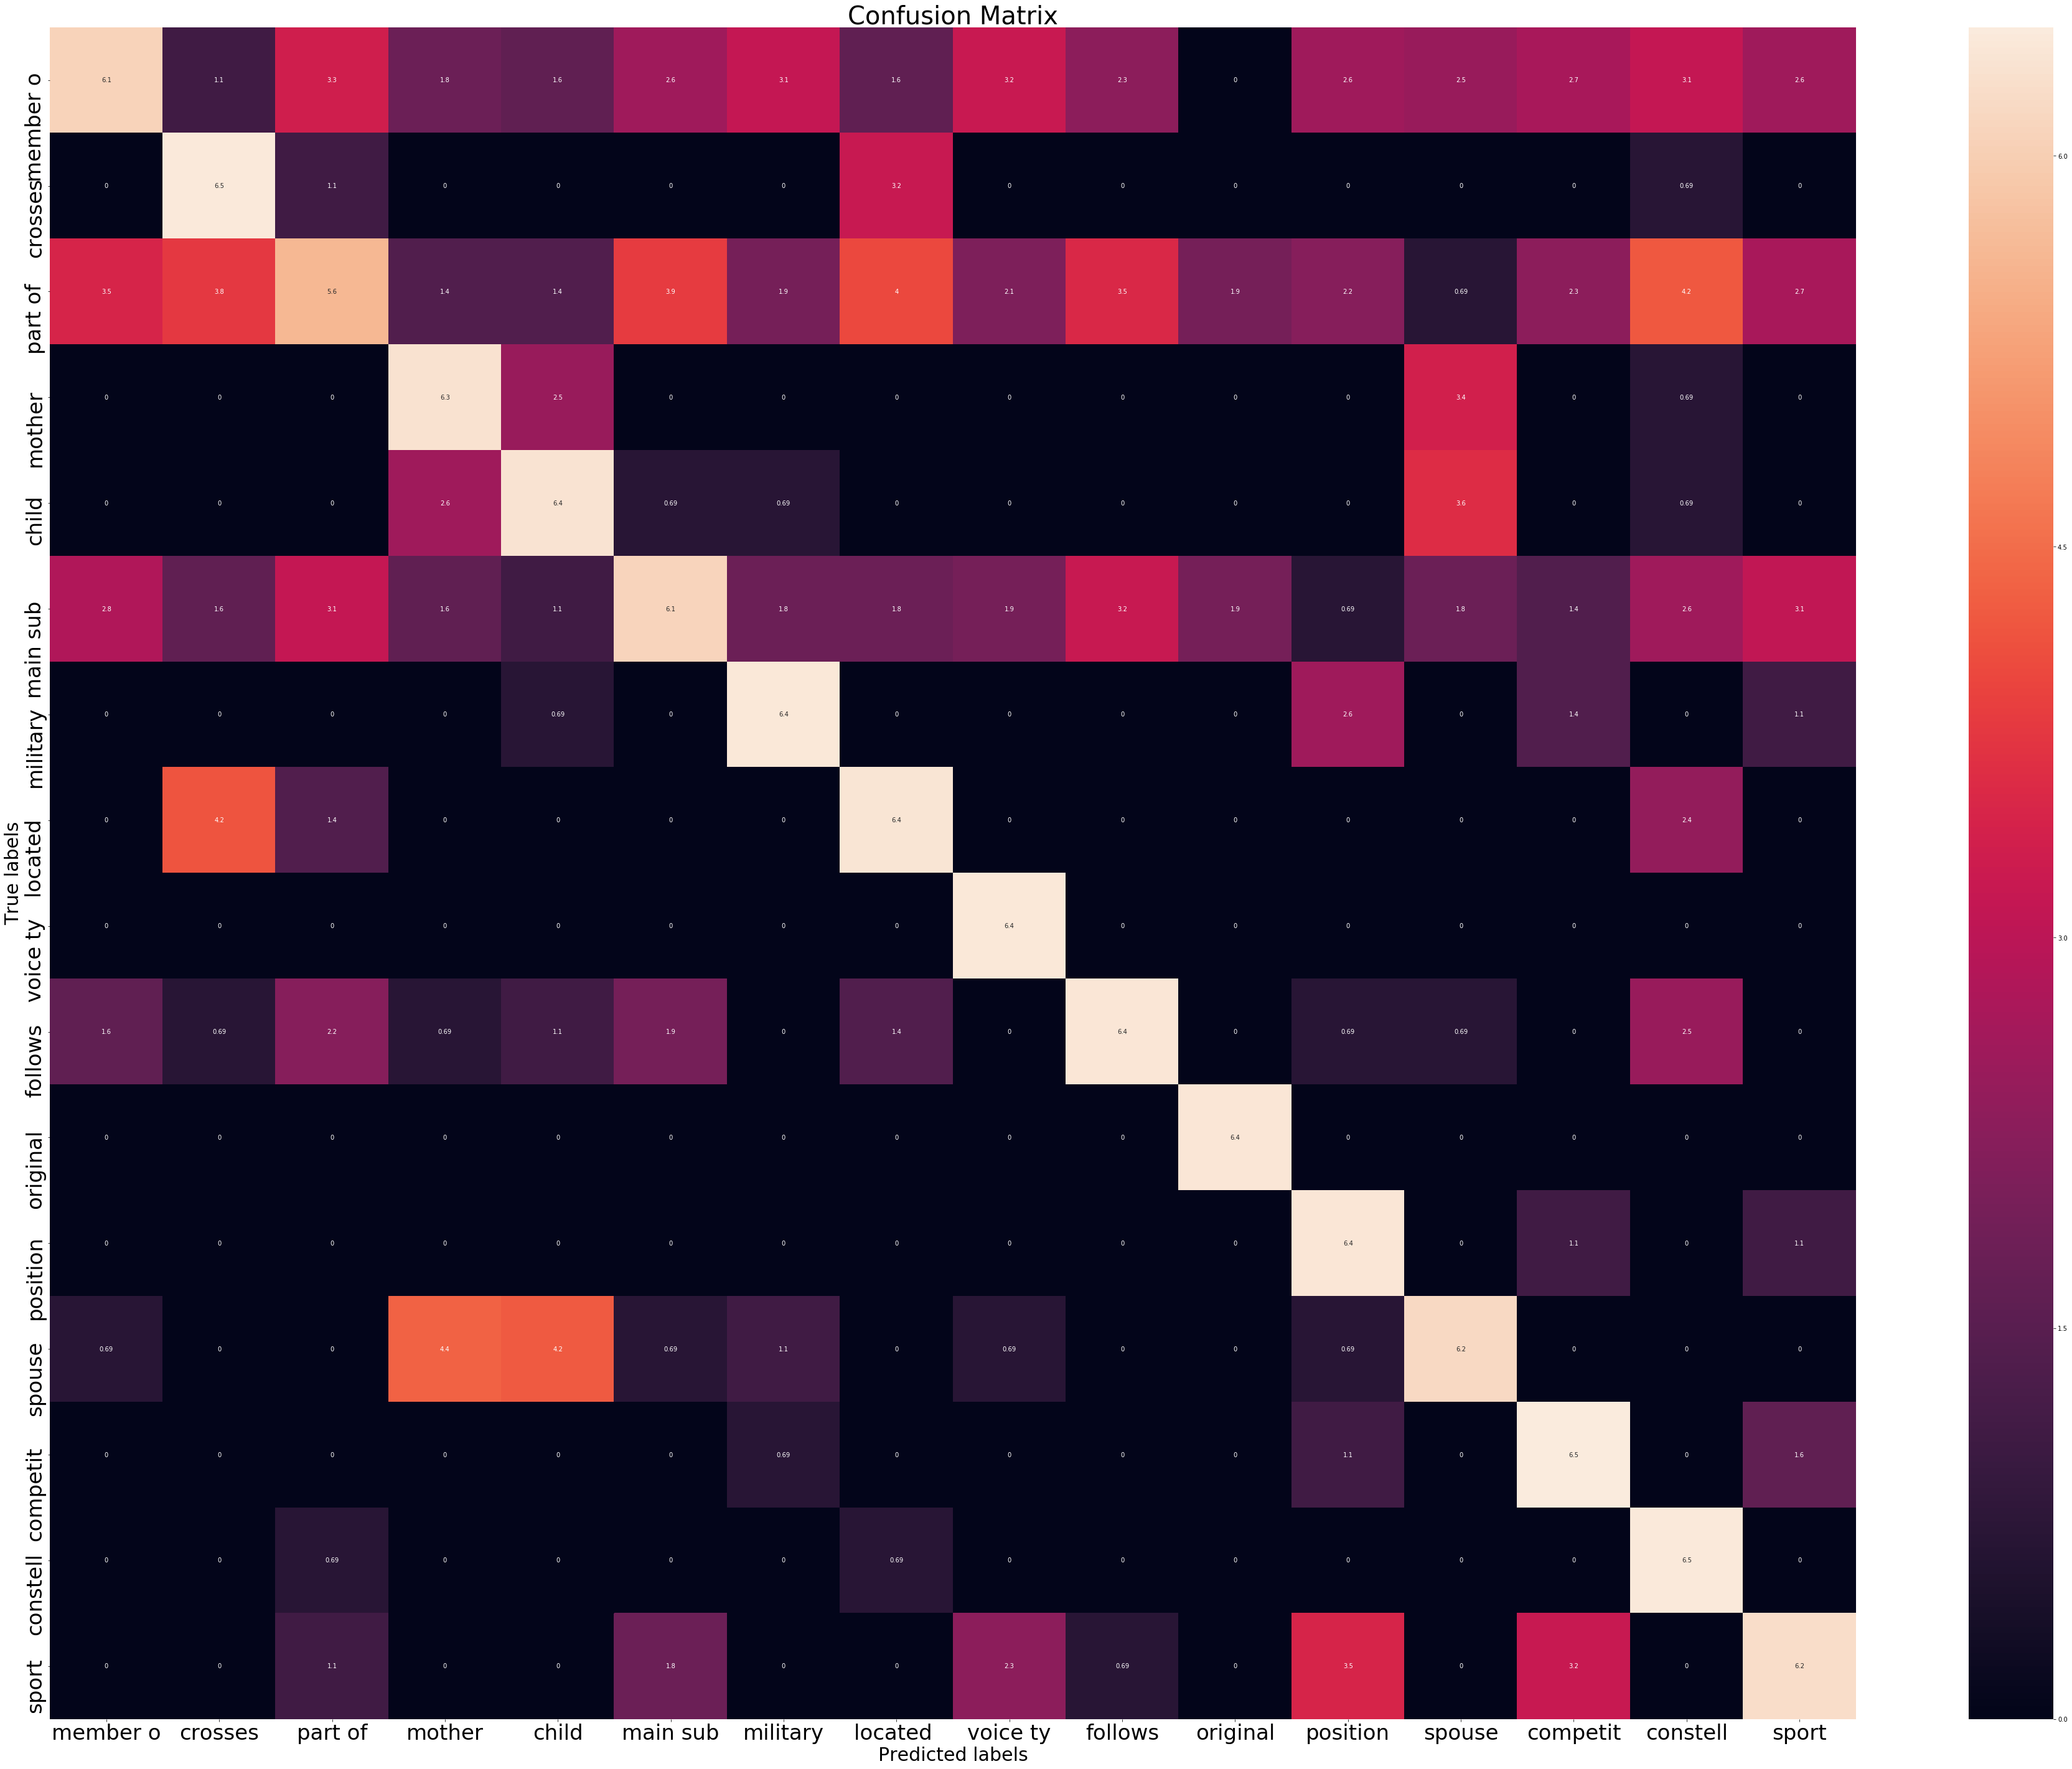

In [28]:
import seaborn as sns

fig = plt.figure(figsize=(65,50))
# ax = fig.add_subplot(111)
ax= plt.subplot()
sns.heatmap(lcm, annot=True, ax = ax) #annot=True to annotate cells
# sns.set(font_scale=-4.4)
# labels, title and ticks

ax.set_xlabel('Predicted labels',fontsize=30);ax.set_ylabel('True labels',fontsize=30); 
ax.set_title('Confusion Matrix',fontsize=40); 
ax.xaxis.set_ticklabels([x[:8] for x in result_per_type.keys()],fontsize=34)
ax.yaxis.set_ticklabels([x[:8] for x in result_per_type.keys()],fontsize=34)



In [29]:
this_dict = {}
for k,v in wrong_prediction_which_rel.items():
    this_dict[k] = [rel_type for rel_type,count in v.most_common()[:5]]
this_dict

{'crosses': ['located in or next to body of water',
  'part of',
  'constellation'],
 'main subject': ['follows', 'part of', 'sport', 'member of', 'constellation'],
 'part of': ['constellation',
  'located in or next to body of water',
  'main subject',
  'crosses',
  'follows'],
 'member of': ['part of',
  'voice type',
  'constellation',
  'military rank',
  'competition class'],
 'sport': ['position played on team / speciality',
  'competition class',
  'voice type',
  'main subject',
  'part of'],
 'child': ['spouse',
  'mother',
  'military rank',
  'constellation',
  'main subject'],
 'spouse': ['mother',
  'child',
  'military rank',
  'position played on team / speciality',
  'voice type'],
 'follows': ['constellation',
  'part of',
  'main subject',
  'member of',
  'located in or next to body of water'],
 'located in or next to body of water': ['crosses',
  'constellation',
  'part of'],
 'mother': ['spouse', 'child', 'constellation'],
 'position played on team / speciality':

In [ ]:
# check agremment with the model prediction 
# try to come up with b=new baselines to show that data is no good
# Elmo should do worse?
# only entity type is helpful?


In [ ]:
E try to mimic with the same model
no realtion inside TACRED and it may be the target 